# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation

## Store:

1. Target Market/City: Stores located in urban or Tier 1 cities should have higher sales because of financially better and higher income people.

2. location: Stores located near popular marketplaces should have higher sales because of better access to customers.
3. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
4. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.
5. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
6. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
7. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
8. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
9. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.



## Product:


1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Product Placement (Visibility in Store): The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

# Loading Packages and Data

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset using Pandas DataFrame

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Structure and Content

In [6]:
# number of data points

train.shape, test.shape

((8523, 12), (5681, 11))

In [7]:
len(train['Item_Identifier'].unique())

1559

In [8]:
len(train['Outlet_Identifier'].unique())

10

## Number of unique products is 1559 so column Item_Identifier is products.
## Number of stores or we can say outlets or Outlet_Identifier is 10.

## Train and Test contains 8523 and 5681 no of data respectively.

## Test data is missing one column that is target variable ( Item_Outlet_Sales )

In [9]:
# information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### There are missing values in the columns 'Item_Weight', 'Outlet_Size'.
this may be because of 
1. The product not weighted.
2. The outlet size was not entered.


In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

### There are No duplicate Values

Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

# Exploratory Data Analysis & Missing Value Treatment

In [13]:
# checking missing values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
print(f"There are {train['Item_Weight'].isnull().sum()} missing in train and {test['Item_Weight'].isnull().sum()} in test")

print(f"There are {train['Outlet_Size'].isnull().sum()} missing in train and {test['Outlet_Size'].isnull().sum()} in test")


There are 1463 missing in train and 976 in test
There are 2410 missing in train and 1606 in test


In [16]:
train["Item_Weight"].mean(), test["Item_Weight"].mean()

(12.857645184136183, 12.695633368756374)

In [17]:
# filling missing values in "Item_Weight" column with "Mean" value

train["Item_Weight"].fillna(train["Item_Weight"].mean(), inplace = True)
test["Item_Weight"].fillna(test["Item_Weight"].mean(), inplace = True)

In [18]:
# checking missing values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:

test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
# filling missing values in "Outlet_Size" column with "Mode" value

mode_outlet_size = train.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc= (lambda x: x.mode()[0])) 
mode_outlet_size = test.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc= (lambda x: x.mode()[0])) 

In [21]:
train_mode_outlet_size = train.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc= (lambda x: x.mode()[0])) 
test_mode_outlet_size = test.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc= (lambda x: x.mode()[0])) 


In [22]:
test_mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [23]:
train_missing_values = train["Outlet_Size"].isnull()
test_missing_values = test["Outlet_Size"].isnull()


In [24]:
train.loc[train_missing_values, "Outlet_Size"] = train.loc[train_missing_values, "Outlet_Type"].apply(lambda x: train_mode_outlet_size[x])
test.loc[test_missing_values, "Outlet_Size"] = test.loc[test_missing_values, "Outlet_Type"].apply(lambda x: test_mode_outlet_size[x])

In [25]:
# checking missing values

train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [27]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [28]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [37]:
train['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat', inplace=True)
train['Item_Fat_Content'].replace(to_replace='reg',value='Regular', inplace=True)

In [38]:
test['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat', inplace=True)
test['Item_Fat_Content'].replace(to_replace='reg',value='Regular', inplace=True)

In [39]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [40]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## Some of the items such as Household, Health and Hygiene, Others are Non-Consumables

# Univariate Analysis

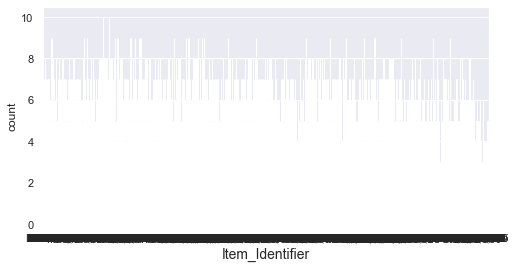

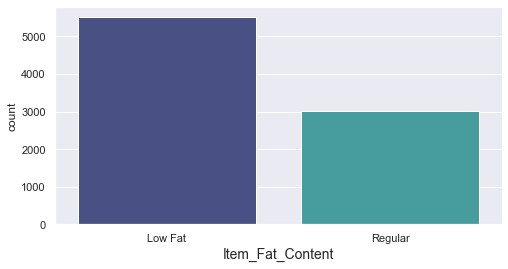

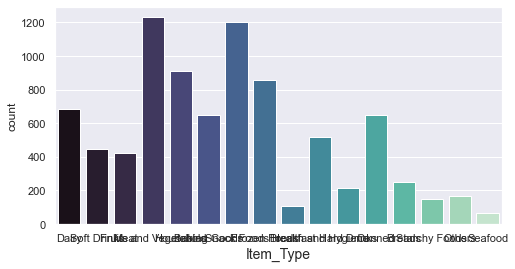

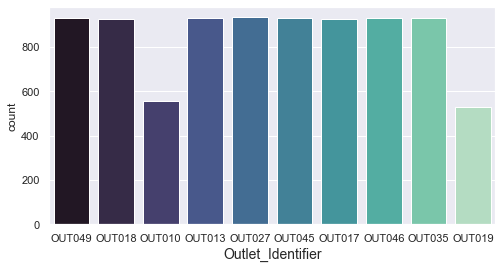

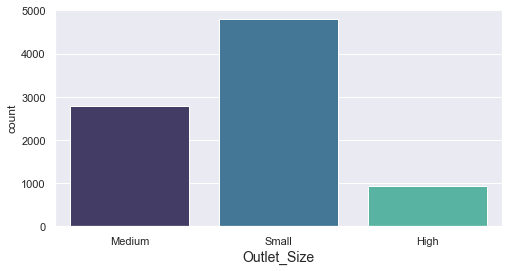

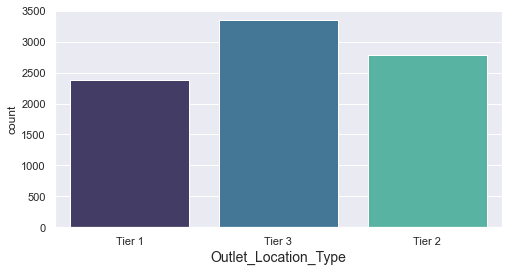

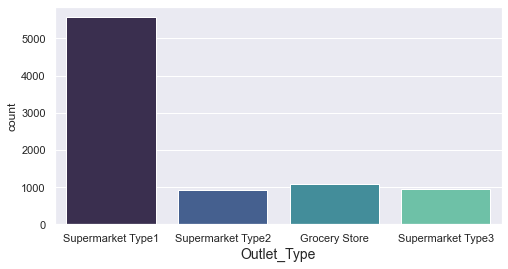

In [41]:
#categorical variables
x = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in x: 
    plt.figure(figsize=(8,4))
    sns.countplot(x = i , data=train , palette='mako')
    plt.xlabel(i, fontsize=14)
    plt.show()

In [42]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


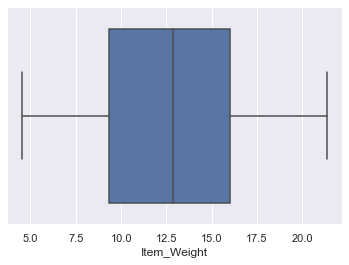

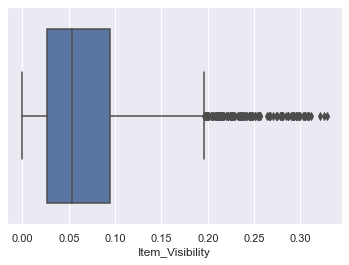

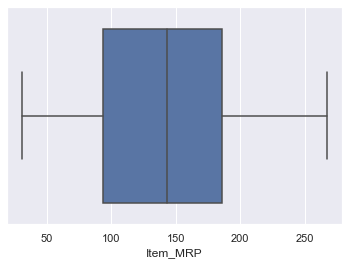

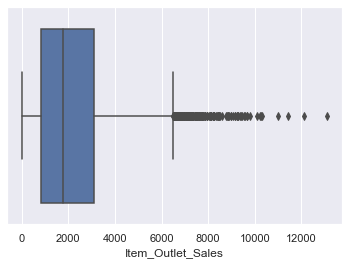

In [44]:
x= ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales' ]
for i in x:
    sns.boxplot(x=i, data=train, orient='h')
    plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

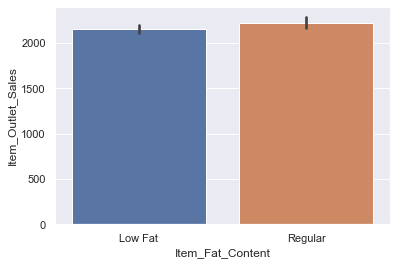

In [45]:
sns.barplot(x = train['Item_Fat_Content'],y = train['Item_Outlet_Sales'])


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

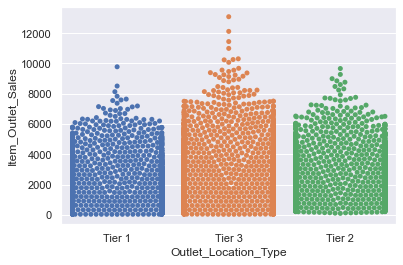

In [46]:
sns.swarmplot(x = train['Outlet_Location_Type'],y = train['Item_Outlet_Sales'])

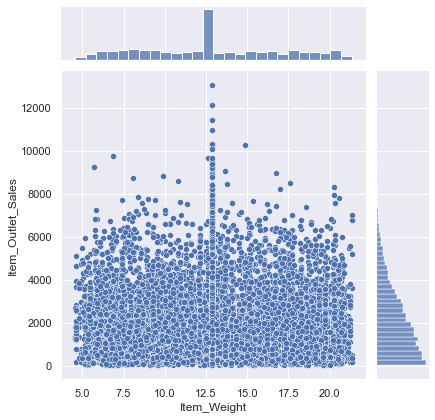

In [47]:
sns.jointplot(x = train['Item_Weight'],y = train['Item_Outlet_Sales'])


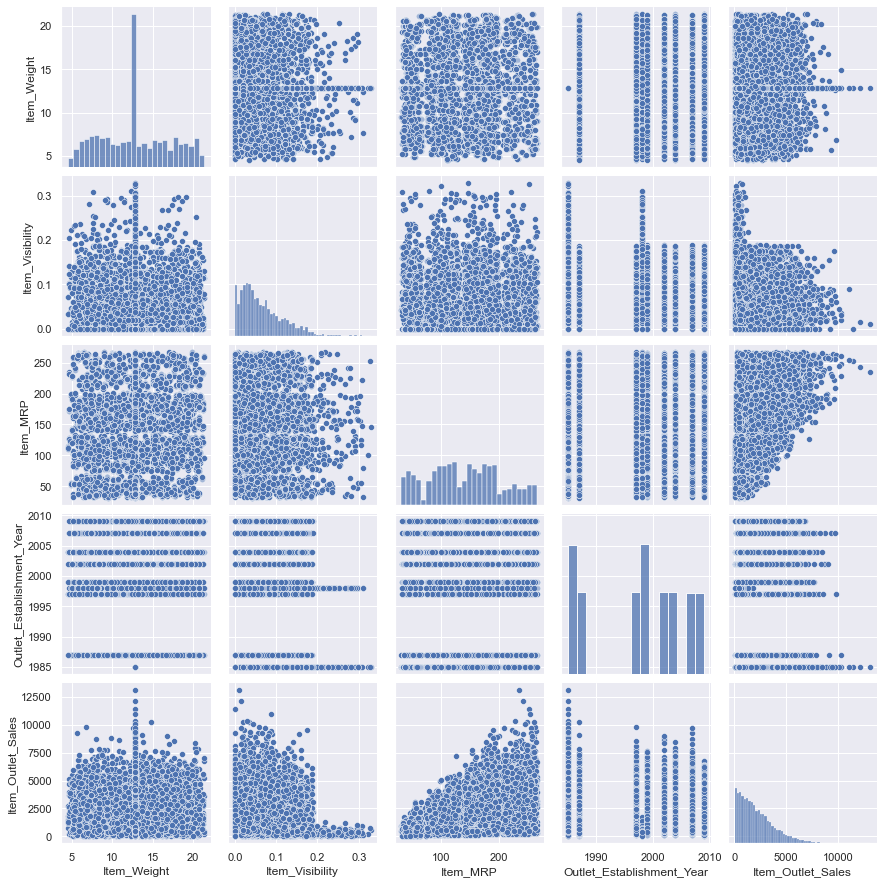

In [48]:
sns.pairplot(data = train)


## So much change in sales and MRP in same item may be because of outlet Region wise Price.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

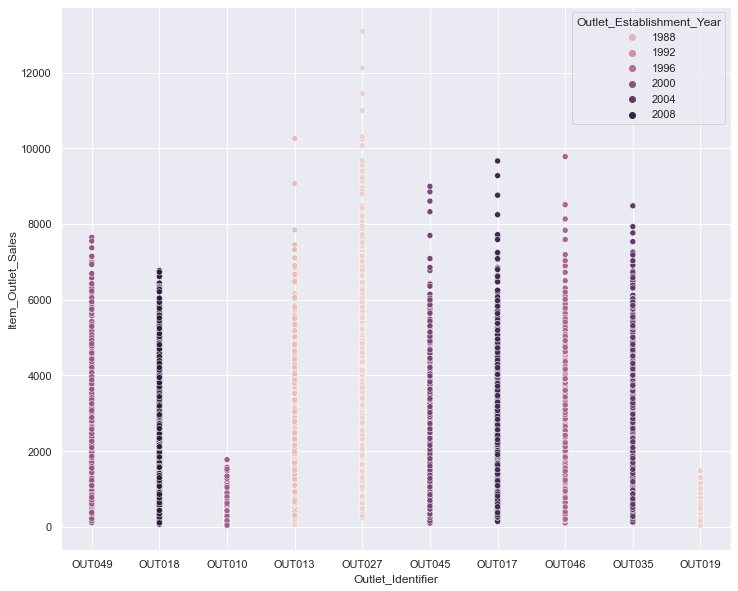

In [49]:
plt.figure(figsize=[12,10])

sns.scatterplot(x = train['Outlet_Identifier'], y = train['Item_Outlet_Sales'], hue=train['Outlet_Establishment_Year'])


## This shows the store before establishment year 1995 has highest sales except OUT019 It has least sales

No handles with labels found to put in legend.


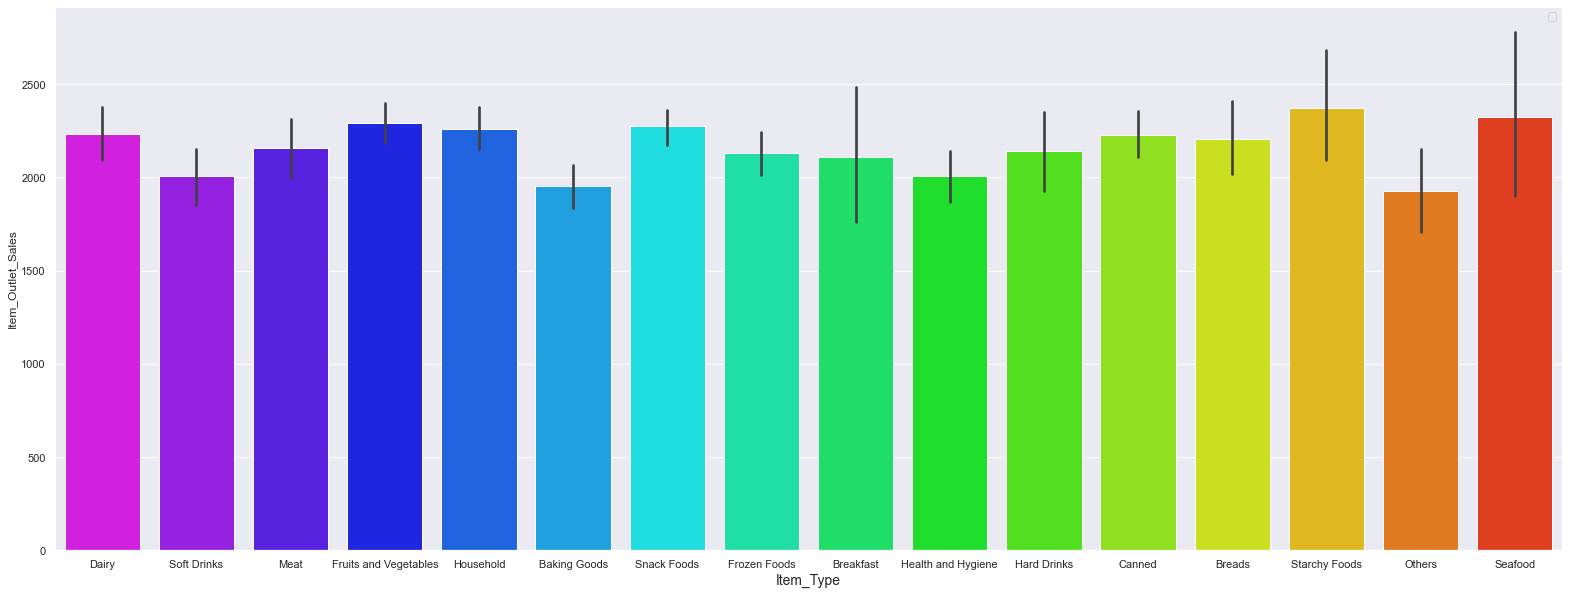

In [50]:
# Sales wrt item types
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


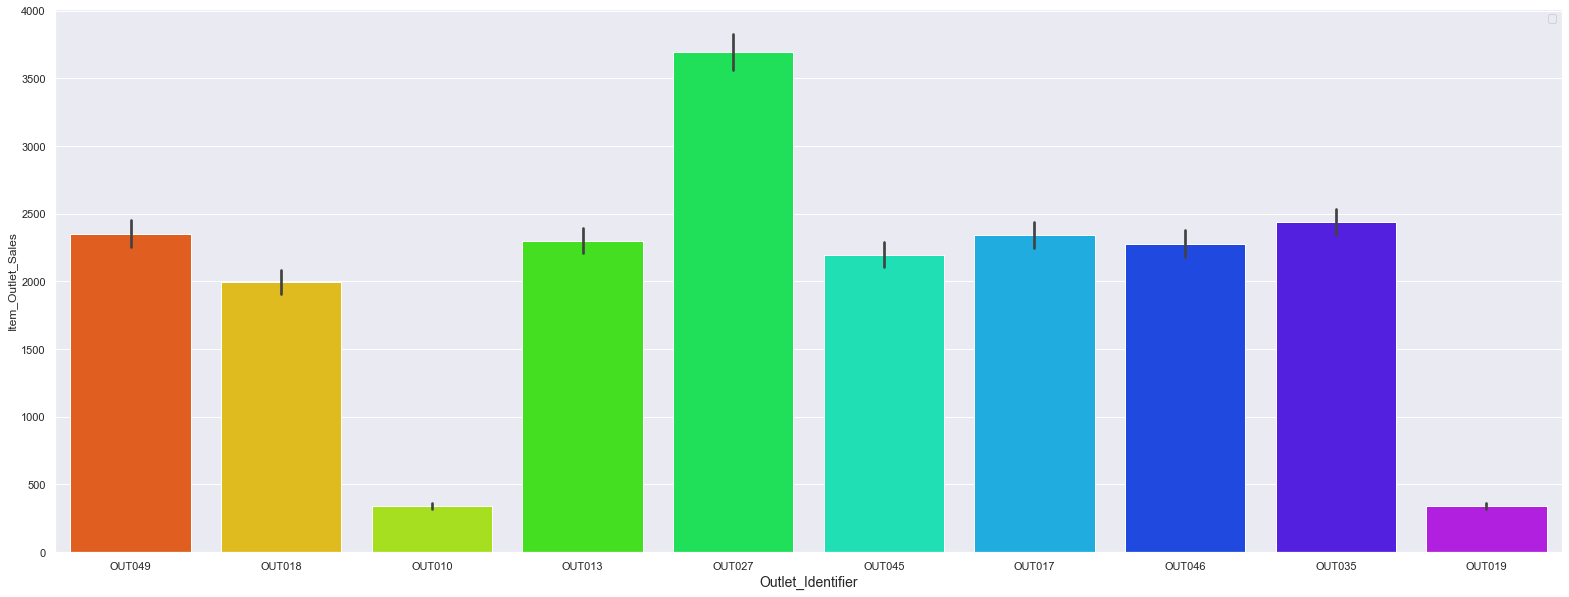

In [51]:
# sales wrt outlet stores

plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

<AxesSubplot:>

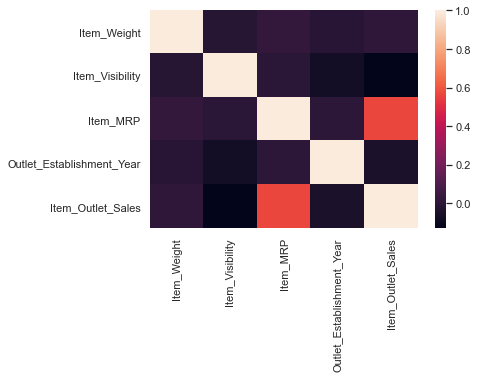

In [52]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket')

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

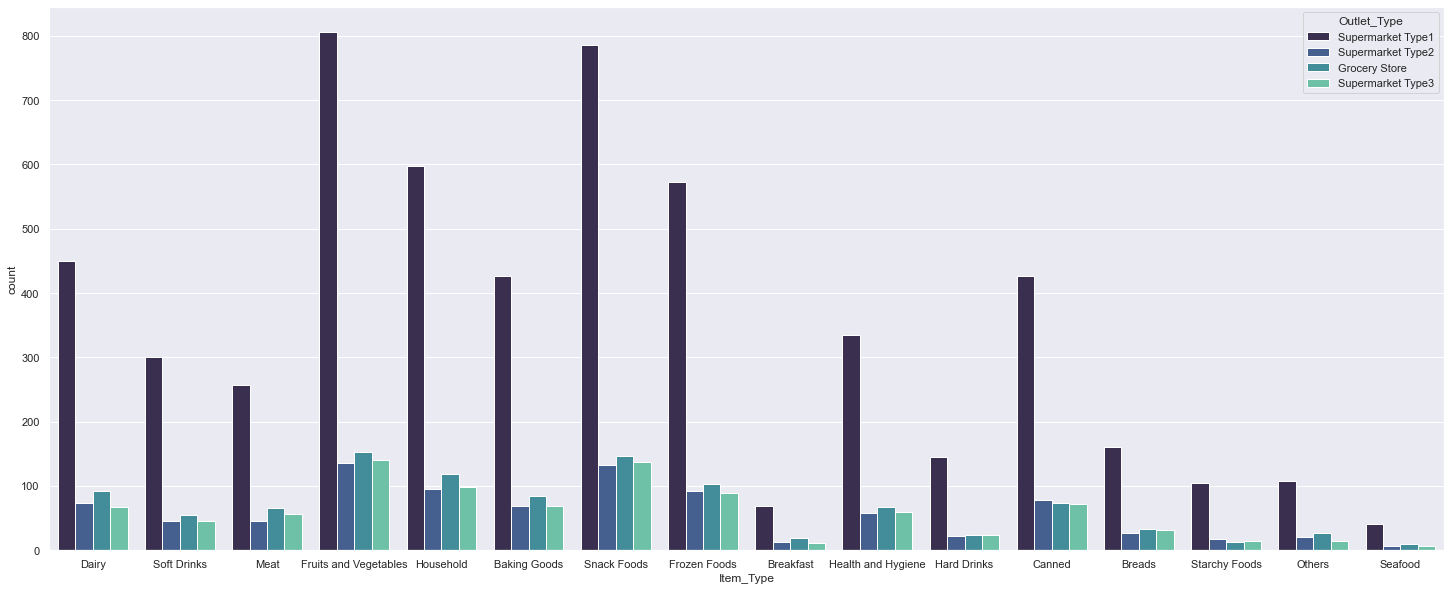

In [53]:
plt.figure(figsize=[25,10])
sns.countplot(x = "Item_Type", data=train, palette='mako', hue='Outlet_Type', orient='v')


# Feature Engineering

In [54]:
def cal_outlet_year(df):
    #Years:
    df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']
    print(df['Outlet_Years'].describe())


In [55]:
cal_outlet_year(train)
cal_outlet_year(test)

count    8523.000000
mean       24.168133
std         8.371760
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64
count    5681.000000
mean       24.171097
std         8.372256
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64


In [56]:
train.drop(columns="Outlet_Establishment_Year", inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,35
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,20
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [57]:
test.drop(columns="Outlet_Establishment_Year", inplace=True)
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,23
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,15
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,24
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,15
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,37
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,25
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,13
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,20
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,15


In [58]:
new = train.groupby(["Item_Identifier","Item_Type"]).size()
new

Item_Identifier  Item_Type         
DRA12            Soft Drinks           6
DRA24            Soft Drinks           7
DRA59            Soft Drinks           8
DRB01            Soft Drinks           3
DRB13            Soft Drinks           5
                                      ..
NCZ30            Household             7
NCZ41            Health and Hygiene    5
NCZ42            Household             5
NCZ53            Health and Hygiene    5
NCZ54            Household             7
Length: 1559, dtype: int64

### As we can see in Item_Identifier the first two letters show the item type description.

DR   ==   Drinks

FD.  ==   Food items

NC.  ==   Non Consumables such as household items

In [59]:
new.dtype

dtype('int64')

In [60]:
train.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [61]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2]) #Taking first two initials
train['Item_Type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 8523, dtype: object

In [62]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(train['Item_Type_Combined'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64


In [63]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Type_Combined, Length: 5681, dtype: object

In [64]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(test['Item_Type_Combined'].value_counts())

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64


In [65]:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(train['Item_Fat_Content'].value_counts())

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


In [66]:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(test['Item_Fat_Content'].value_counts())

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64


In [67]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable


In [68]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,23,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,15,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,24,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,15,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,37,Food


### Saving the first cleaned csv file

In [69]:
train.to_csv("cleaned_train.csv",index=False)
test.to_csv("cleaned_test.csv", index=False)

## Label Encoding and One-hot Encoding

In [70]:
# read in csv file train
train1 = pd.read_csv("cleaned_train.csv")
# read in csv file test
test1 = pd.read_csv("cleaned_test.csv")

In [71]:
le = LabelEncoder()
Labels = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Labels:
    train1[i] = le.fit_transform(train1[i])
    test1[i] = le.fit_transform(test1[i])

In [72]:
train1['Outlet'] = le.fit_transform(train1['Outlet_Identifier'])
test1['Outlet'] = le.fit_transform(test1['Outlet_Identifier'])

train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,23,Food,9
1,DRC01,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,13,Drinks,3
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,23,Food,9
3,FDX07,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,Grocery Store,732.3800,24,Food,0
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,35,Non-Consumable,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,0,2,Supermarket Type1,2778.3834,35,Food,1
8519,FDS36,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2,1,Supermarket Type1,549.2850,20,Food,7
8520,NCJ29,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2,1,Supermarket Type1,1193.1136,18,Non-Consumable,6
8521,FDN46,7.210,2,0.145221,Snack Foods,103.1332,OUT018,1,2,Supermarket Type2,1845.5976,13,Food,3


In [73]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1,0,Supermarket Type1,23,Food,9
1,FDW14,8.300000,2,0.038428,Dairy,87.3198,OUT017,2,1,Supermarket Type1,15,Food,2
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,2,2,Grocery Store,24,Non-Consumable,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2,1,Supermarket Type1,15,Food,2
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1,2,Supermarket Type3,37,Food,5


In [74]:

train1 = pd.get_dummies(train1, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)
test1 = pd.get_dummies(test1, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)


In [75]:
train1.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)
test1.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)

In [76]:
test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0,0.007565,107.8622,23,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,2,0.038428,87.3198,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,24,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,155.0340,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,12.695633,2,0.118599,234.2300,37,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,141.3154,25,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5677,7.600000,2,0.142991,169.1448,13,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,10.000000,1,0.073529,118.7440,20,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5679,15.300000,2,0.000000,214.6218,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


## Taking all the features from outlet cause the outlet is giving variation in the prices

### Saving the cleaned data ready for model preparation

In [77]:
train1.to_csv("Train_model_data.csv", index=False)
test1.to_csv("Test_model_data.csv", index=False)

## PreProcessing for model preparation


In [78]:
train2 = pd.read_csv("Train_model_data.csv")
# test2 = pd.read_csv("Test_model_data.csv")

In [79]:
train2.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0,0.016047,249.8092,3735.1380,23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,443.4228,13,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2097.2700,23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,732.3800,24,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,994.7052,35,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0


In [80]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8523 non-null   float64
 1   Item_Fat_Content                   8523 non-null   int64  
 2   Item_Visibility                    8523 non-null   float64
 3   Item_MRP                           8523 non-null   float64
 4   Item_Outlet_Sales                  8523 non-null   float64
 5   Outlet_Years                       8523 non-null   int64  
 6   Outlet_Location_Type_1             8523 non-null   int64  
 7   Outlet_Location_Type_2             8523 non-null   int64  
 8   Outlet_Size_1                      8523 non-null   int64  
 9   Outlet_Size_2                      8523 non-null   int64  
 10  Outlet_Type_Supermarket Type1      8523 non-null   int64  
 11  Outlet_Type_Supermarket Type2      8523 non-null   int64

In [81]:
train2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.892995,0.066132,140.992782,2181.288914,24.168133,0.326763,0.393054,0.327702,0.562947,...,0.187610,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,4.226124,0.895005,0.051598,62.275067,1706.499616,8.371760,0.469057,0.488457,0.469403,0.496051,...,0.390423,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,4.555000,0.000000,0.000000,31.290000,33.290000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,834.247400,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,1.000000,0.053931,143.012800,1794.331000,23.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,2.000000,0.094585,185.643700,3101.296400,35.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,2.000000,0.328391,266.888400,13086.964800,37.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Assigning Independent and Target variables to X and Y Respectively


In [82]:
X = train2.drop(columns="Item_Outlet_Sales")
Y = train2.Item_Outlet_Sales


### Performing Train_Test_Split for validation of performance of model

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.15)

In [84]:
X_train.shape, X_test.shape


((7244, 23), (1279, 23))

In [85]:
scaled = StandardScaler()
X_train[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X_train[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])


## To avoid data leakage we will use fit_transform in both the train and test data seperately


In [86]:
scaled1 = StandardScaler()
X_test[['Item_Weight','Item_Visibility','Item_MRP',
        'Outlet_Years']] = scaled.fit_transform(X_test[['Item_Weight',
                                                        'Item_Visibility','Item_MRP','Outlet_Years']])


In [87]:
X_train[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
2221,-1.363121,0,0.846278,0.498705,-0.730576,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
7535,-0.523382,2,0.368481,1.410495,-0.134584,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4362,-0.840354,0,-0.545911,-1.277400,0.103813,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1665,-1.438815,2,-1.279445,1.375258,-0.134584,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6678,-0.653483,1,0.534572,-0.414689,-0.015385,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
X_test[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
7503,0.348733,0,-0.777107,-0.924852,1.283882,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2957,-1.161995,1,0.106423,-1.521308,0.073886,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
7031,0.396166,2,-0.481256,-1.532080,-0.168113,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1084,0.006660,2,-0.413196,0.606429,1.525881,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
856,-0.624821,2,-1.049914,0.993095,-0.773110,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

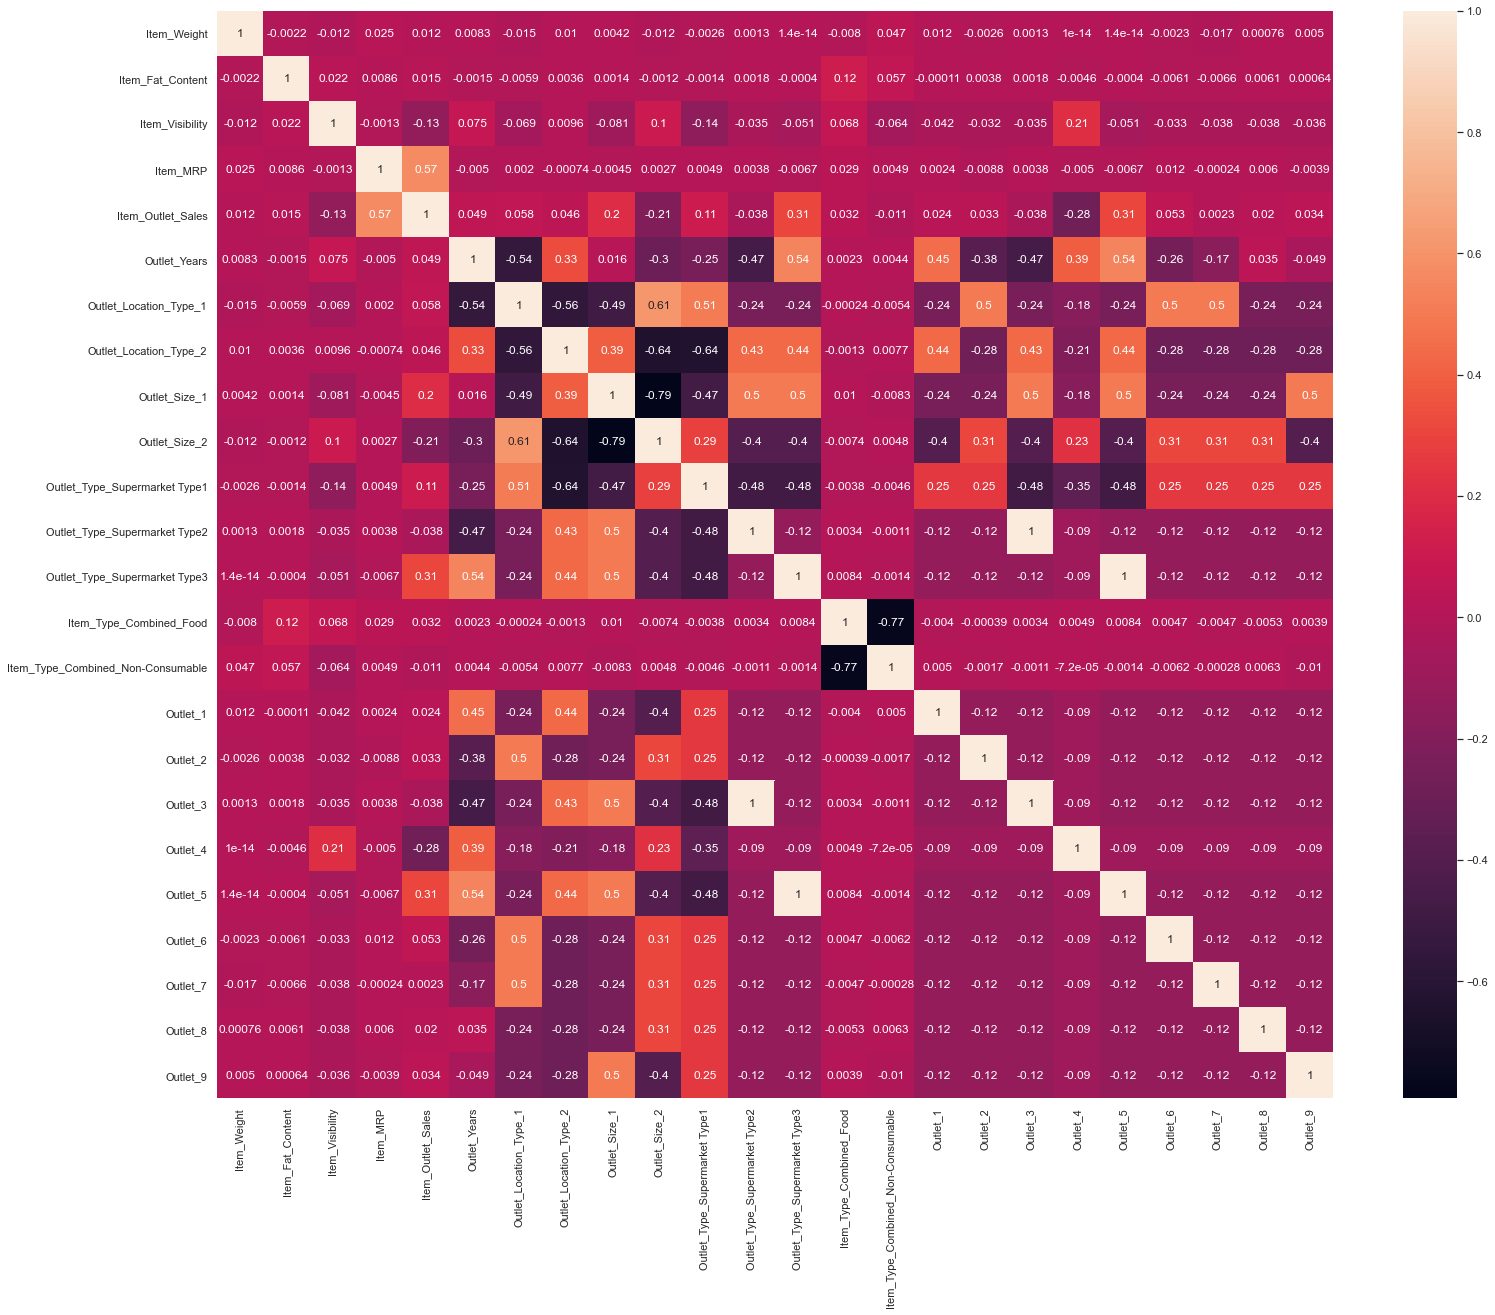

In [89]:
plt.figure(figsize = (25,20))
sns.heatmap(train2.corr(),annot = True)

# Linear Regression

In [90]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

LinearRegression()

In [91]:
def all_scores(model):
    print("Training score", model.score(X_train,Y_train))
    print("Test score", model.score(X_test, Y_test))
    preds = model.predict(X_test)
    print("linear_predicted values: ", preds)
    print("MAE : %.4g" % np.sqrt(mean_absolute_error(Y_test,preds)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_test,preds)))

def cross_validate(model,X,Y, cv):
    cv_score = cross_val_score(model,X=X, y=Y, cv=cv)
    print("cv_scores", cv_score)
    print('cv_score.mean', cv_score.mean())

In [92]:
all_scores(model_linear)

Training score 0.5596926569428871
Test score 0.5828361141541214
linear_predicted values:  [1430.3125167   753.10325507  918.04824912 ... 2302.86651621 2928.8526588
  931.27796504]
MAE : 28.4
RMSE : 1083


### Cross_validation of model and mean accuracy 

In [93]:
X = train2.drop(columns="Item_Outlet_Sales")
Y = train2.Item_Outlet_Sales


In [94]:
scaled = StandardScaler()
X[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])


In [95]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.841872,0,-0.970732,1.747454,-0.139541,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.641706,2,-0.908111,-1.489023,-1.334103,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.098554,0,-0.956917,0.010040,-0.139541,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.500838,2,-1.281758,0.660050,-0.020085,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.929428,1,-1.281758,-1.399220,1.293934,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [96]:
cross_validate(model_linear,X, Y,5)

cv_scores [0.5711947  0.55542836 0.54759554 0.56617121 0.56509014]
cv_score.mean 0.5610959879125045


# Regularized Linear Regression

## Ridge Regression

In [98]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=15,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([5.16310778, 4.68759885, 5.28505919, 3.13868576, 8.18018437,
       8.22620222, 7.31352133, 6.61267324, 1.26863018, 8.2537982 ,
       4.67796197, 3.80814855, 0.35296667, 7.92173806, 1.52269304,
       5.49874021, 5.13085761, 9.20665152, 8.2547228 , 5.09223478,
       9.47707702, 5.30415823, 3.70817791, 5.10322449, 4.09921441,
       4.10634935, 7.0118859 , 7.02901595, 1.63884372, 9.29684366,
       1.42073573, 9.00920822, 4.707021  , 9.62204827, 7.8494567 ,
       7.48533657, 5.41746391, 8.61165136, 6.27451326, 6.69675361,
       6.32399357, 6.81595677, 0.51640828, 2.51241189, 5.02446695,
       6.87321694, 7.82394276, 7.814976  , 3.40896627, 5.99801662]),
        cv=15, normalize=True)

### Using ridgecv to find optimal value of alphas

In [99]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.35296667479776445)

In [100]:
all_scores(ridge_model)

Training score 0.5596926059983542
Test score 0.5828378490051738
linear_predicted values:  [1430.36549792  752.84617754  918.40734796 ... 2302.55666142 2928.71508855
  932.3089338 ]
MAE : 28.4
RMSE : 1083


## Lasso Regression

In [101]:
lassocv= LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True, random_state=42)
lassocv.fit(X_train,Y_train)

LassoCV(cv=10, normalize=True, random_state=42)

In [102]:
lasso_reg = Lasso(alpha=lassocv.alpha_)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.028124124163188907)

In [103]:
all_scores(lasso_reg)

Training score 0.5596926152816393
Test score 0.5827354154642987
linear_predicted values:  [1431.46397779  755.95474698  921.60660004 ... 2307.61041544 2932.348396
  935.26875277]
MAE : 28.4
RMSE : 1083


## Dicission Tree Regression

In [105]:
model_dt = DecisionTreeRegressor()


### Using RandomizedSearchCV for Hyper-Parameter Tuning 


In [106]:
params = {
    'max_depth': [2, 3, 4, 5, 8, 10, 12, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["squared_error", "absolute_error"],
    'max_features':["sqrt","auto","log2", 0.2, None]
}
random_search = RandomizedSearchCV(estimator=model_dt,param_distributions=params,cv=10,n_iter=10)


In [107]:
random_search.fit(X_train,Y_train)


KeyError: 'absolute_error'

#### Best Parameters

In [108]:
random_search.best_params_

{'min_samples_leaf': 100,
 'max_features': 0.2,
 'max_depth': 3,
 'criterion': 'absolute_error'}

### Fitting a the model with best params

In [110]:
model_dt = DecisionTreeRegressor(max_depth=10,max_features=None, 
                                 min_samples_leaf=100, criterion='squared_error')

In [111]:
model_dt.fit(X_train,Y_train)

KeyError: 'squared_error'

### Performance of model in train and test 

In [112]:
all_scores(model_dt)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

### Cross_validation of model and mean accuracy 

In [114]:
model_DT = DecisionTreeRegressor(max_depth=10,max_features=None, 
                                 min_samples_leaf=100, criterion='squared_error')
model_DT.fit(X,Y)

KeyError: 'squared_error'

In [115]:
cross_validate(model_DT,X, Y,10)

cv_scores [nan nan nan nan nan nan nan nan nan nan]
cv_score.mean nan


## Random Forest Regressor

In [117]:
model_Rf = RandomForestRegressor()
model_Rf.fit(X_train,Y_train)

RandomForestRegressor()

In [118]:
all_scores(model_Rf)

Training score 0.9377480464892374
Test score 0.5694442806166587
linear_predicted values:  [1138.178442  949.870228  772.12826  ... 2069.452876 2962.630234
  596.476904]
MAE : 27.52
RMSE : 1101


### As we can see it is overfitting so we do Hyper-Parameter tuning

### Using RandomizedSearchCV for Hyper-Parameter Tuning 

In [120]:
param = {
    'max_depth':[3,6,9,12],
    'n_estimators' : [10,50,100,200] 
}

In [121]:
random_search = RandomizedSearchCV(model_Rf, param_distributions=param,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)


In [122]:
random_search.fit(X_train,Y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

#### Best Parameters

In [124]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 6}

### Fitting a the model with best params

In [126]:
model_Rf = RandomForestRegressor(n_estimators=200, max_depth=6)

In [127]:
model_Rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [128]:
all_scores(model_Rf)

Training score 0.6304867460806091
Test score 0.6129462012006881
linear_predicted values:  [1330.82733259  737.96777504  736.85416065 ... 2415.22050801 3115.11242855
  453.82445032]
MAE : 26.9
RMSE : 1044


### Cross_validation of model and mean accuracy 

In [129]:
cross_validate(model_Rf, X, Y, 20)

cv_scores [0.60050215 0.59840881 0.61573185 0.61924419 0.58934542 0.54692892
 0.57765446 0.61703394 0.54950984 0.51297956 0.66023375 0.56100042
 0.62089018 0.61655257 0.62857157 0.55761429 0.6362661  0.62239804
 0.582854   0.57022979]
cv_score.mean 0.5941974918934123


# XGBoost Regression

In [131]:
model_XGB = XGBRegressor()


### Using RandomizedSearchCV for Hyper-Parameter Tuning 

In [132]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "learning_rate": [.03, 0.05, .07]   
}

In [133]:
random_search = RandomizedSearchCV(model_XGB, param_distributions=params,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)


In [134]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                             

#### Best Parameters

In [135]:
random_search.best_score_

0.5873825941304385

In [136]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.07,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

### Fitting a the model with best params

In [138]:
model_XGB =  XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)

In [139]:
model_XGB.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [140]:
all_scores(model_XGB)

Training score 0.6014769062821996
Test score 0.5945361741089722
linear_predicted values:  [1427.4971   954.75006 1011.0094  ... 2118.6501  2802.3633   517.6173 ]
MAE : 27.27
RMSE : 1068


### Cross_validation of model and mean accuracy 

In [141]:
cross_validate(model_XGB, X_train, Y_train, 10)

cv_scores [0.57809907 0.57848647 0.60034745 0.5801872  0.57869461 0.57476346
 0.54942556 0.57606694 0.55159632 0.54847735]
cv_score.mean 0.5716144442109651


## Fitting in full training data

In [142]:
model_XGB2 = XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)
model_XGB2.fit(X, Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [143]:
model_XGB2.score(X,Y)

0.6021275291628398

In [144]:
cross_validate(model_XGB2, X, Y, 10)

cv_scores [0.56578704 0.58657796 0.55330355 0.58220585 0.54602588 0.58007711
 0.59097583 0.56750661 0.60403572 0.55896291]
cv_score.mean 0.5735458446272916


## Gradient Boosting Regression

In [145]:
model_GBR = GradientBoostingRegressor()

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": [.03, 0.05, .07,0.5,1],
}

### Using RandomizedSearchCV for Hyper-Parameter Tuning 

search_cv = RandomizedSearchCV(model_GBR, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2)

In [146]:
search_cv.fit(X_train, Y_train)

NameError: name 'search_cv' is not defined

# All scores of all models

In [147]:
print("Linear Regression   :",
      "Train_score:",model_linear.score(X_train,Y_train),
      " Test_score:", model_linear.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_linear.predict(X_test))))

print("Ridge Regression    :",
      "Train_score:",ridge_model.score(X_train,Y_train),
      " Test_score:",ridge_model.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,ridge_model.predict(X_test))))

print("Lasso Regression    :",
      "Train_score:",lasso_reg.score(X_train,Y_train),
      " Test_score:",lasso_reg.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,lasso_reg.predict(X_test))))

print("Decission Tree      :",
      "Train_score:",model_dt.score(X_train,Y_train),
      "  Test_score:",model_dt.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_dt.predict(X_test))))

print("RandomForest        :",
      "Train_score:",model_Rf.score(X_train,Y_train)   ,
      "  Test_score:",model_Rf.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_Rf.predict(X_test))))

print("XGBoost Regression  :",
      "Train_score:",model_XGB.score(X_train,Y_train)   ,
      "   Test_score:",model_XGB.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_XGB.predict(X_test))))

print("GradientBoosting    :",
      "Train_score:",model_GBR.score(X_train,Y_train),
      " Test_score:",model_GBR.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_GBR.predict(X_test))))


Linear Regression   : Train_score: 0.5596926569428871  Test_score: 0.5828361141541214 MAE: 28.4
Ridge Regression    : Train_score: 0.5596926059983542  Test_score: 0.5828378490051738 MAE: 28.4
Lasso Regression    : Train_score: 0.5596926152816393  Test_score: 0.5827354154642987 MAE: 28.4


AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

## Here Decission Tree regression gives best fit wrt Train and Test score and MAE .

# Predictions

## Lets fit Decission tree model on All the data of training set and give the predictions for Test dataset

In [150]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model_DT, open(filename, 'wb'))
 

In [151]:
test_data = pd.read_csv("Test_model_data.csv")

In [152]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0,0.007565,107.8622,23,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,2,0.038428,87.3198,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,24,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,155.0340,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,12.695633,2,0.118599,234.2300,37,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,141.3154,25,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5677,7.600000,2,0.142991,169.1448,13,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,10.000000,1,0.073529,118.7440,20,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5679,15.300000,2,0.000000,214.6218,15,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [153]:
scaled = StandardScaler()
test_data[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(test_data[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])


In [154]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,1.897460e+00,0,-1.134077,-0.536555,-0.139891,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.035530e+00,2,-0.531850,-0.868937,-1.095512,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,4.486336e-01,1,0.661316,1.629848,-0.020438,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,-1.267578e+00,0,-0.981416,0.226697,-1.095512,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,-5.230960e-14,2,1.032540,1.508110,1.532446,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-5.172506e-01,2,-1.018333,0.004727,0.099015,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5677,-1.200437e+00,2,1.508493,0.455014,-1.334417,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,-6.350414e-01,1,0.153074,-0.360485,-0.498248,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5679,6.135406e-01,2,-1.281690,1.190844,-1.095512,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [155]:
loaded_model = pickle.load(open(filename, 'rb'))

In [156]:
loaded_model.feature_importances_

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

In [157]:
loaded_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [158]:
predictions = loaded_model.predict(test_data)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

In [159]:
test_data["predictions"] = predictions

NameError: name 'predictions' is not defined

In [160]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,...,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,1.897460e+00,0,-1.134077,-0.536555,-0.139891,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.035530e+00,2,-0.531850,-0.868937,-1.095512,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,4.486336e-01,1,0.661316,1.629848,-0.020438,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,-1.267578e+00,0,-0.981416,0.226697,-1.095512,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,-5.230960e-14,2,1.032540,1.508110,1.532446,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-5.172506e-01,2,-1.018333,0.004727,0.099015,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
5677,-1.200437e+00,2,1.508493,0.455014,-1.334417,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,-6.350414e-01,1,0.153074,-0.360485,-0.498248,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
5679,6.135406e-01,2,-1.281690,1.190844,-1.095512,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [161]:
test_data['predictions'].describe()

KeyError: 'predictions'